In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
def activation_func(X):
    f = np.zeros((X.shape[0],1))
    inc = 0
    for x in X:
        if(x >= 0):
            f[inc]=1.0
        else:
            f[inc]=0.0
        inc += 1
    return f

def activation_func2(X):
    f = np.zeros((X.shape[0],1))
    inc = 0
    for x in X:
        if(x[0] >= 0.0):
            f[inc]=1.0
        else:
            f[inc]=0.0
        inc += 1
    return f

def predict(X, W):
    z = X.dot(W)
    a = activation_func(z)
    return a

## AND boolean function

In [46]:
x0 = np.array([1,1,1,1])
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])

X = np.c_[x0,x1,x2]

y = np.array([0,0,0,1])

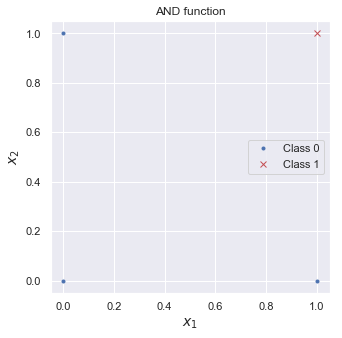

In [47]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('AND function')
plt.legend()
plt.show()

In [48]:
alpha = 0.001

W = np.zeros((X.shape[1],1))
W = np.random.randn(X.shape[1],1)

numEpochs = 1000
error_min = 10000000
idx = [0,1,2,3]
error_vec = []
for epoch in range(0,numEpochs):
    Xp = X[idx]
    yp = y[idx]
    
    for i in range(0,4):
        xp = Xp[i,:].reshape(1,3)
        g = xp.dot(W)
        y_pred = activation_func(g)
        e = yp[i].ravel()[0]-y_pred.ravel()[0]
        W = W + alpha*e*xp.T
    
    idx = np.random.permutation(4)
    
    error = mean_squared_error(activation_func(X.dot(W)), y)
    error_vec.append(error)
    if(error < error_min):
        error_min = error
        Wmin = W
        
error = mean_squared_error(activation_func(X.dot(Wmin)), y)
print('MSE: ', error)

MSE:  0.0


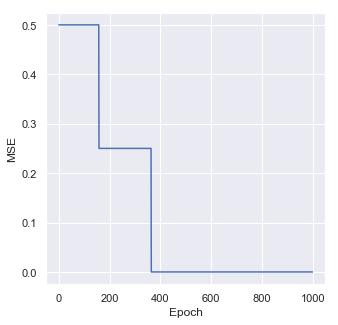

In [49]:
fig = plt.figure(figsize=(5,5))
plt.plot(error_vec)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

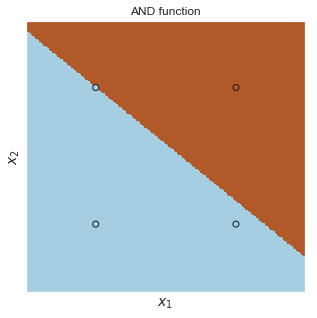

In [50]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()], Wmin)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('AND function')
plt.show()

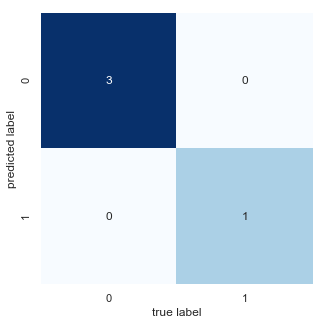

In [51]:
y_pred = predict(X, Wmin)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## OR boolean function

In [52]:
x0 = np.array([1,1,1,1])
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])

X = np.c_[x0,x1,x2]

y = np.array([0,1,1,1])

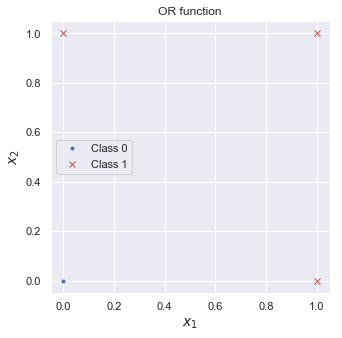

In [53]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('OR function')
plt.legend()
plt.show()

In [54]:
alpha = 0.001

W = np.zeros((X.shape[1],1))
#W = np.random.randn(X.shape[1],1)

numEpochs = 1000
error_min = 10000000
idx = [0,1,2,3]
error_vec = []
for epoch in range(0,numEpochs):
    Xp = X[idx]
    yp = y[idx]
    
    for i in range(0,4):
        xp = Xp[i,:].reshape(1,3)
        g = xp.dot(W)
        y_pred = activation_func(g)
        e = yp[i].ravel()[0]-y_pred.ravel()[0]
        W = W + alpha*e*xp.T
    
    idx = np.random.permutation(4)
    
    error = mean_squared_error(activation_func(X.dot(W)), y)
    error_vec.append(error)
    if(error < error_min):
        error_min = error
        Wmin = W
        
error = mean_squared_error(activation_func(X.dot(Wmin)), y)
print('MSE: ', error)

MSE:  0.0


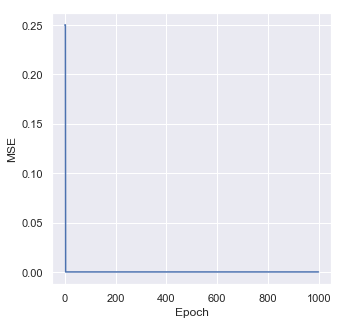

In [55]:
fig = plt.figure(figsize=(5,5))
plt.plot(error_vec)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

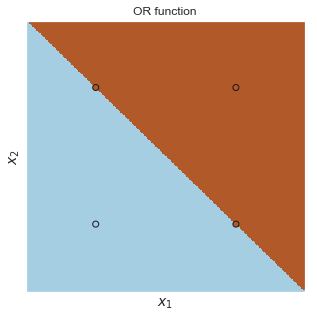

In [56]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()], Wmin)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('OR function')
plt.show()

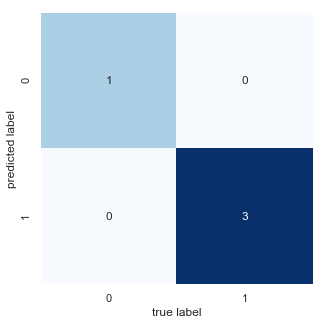

In [57]:
y_pred = predict(X, Wmin)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Noisy AND boolean function

In [58]:
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])

y = np.array([0,0,0,1])

N = 1000

x1_n = np.zeros((N,))
x2_n = np.zeros((N,))
y_n = np.zeros((N,))
for i in range(0,N):
    idx = np.random.randint(0,4)
    x1_n[i] = x1[idx] + 0.1*np.random.randn()
    x2_n[i] = x2[idx] + 0.1*np.random.randn()
    y_n[i] = y[idx]
    
x0 = np.ones((N,))
x1 = x1_n
x2 = x2_n

X = np.c_[x0,x1,x2]

y = y_n

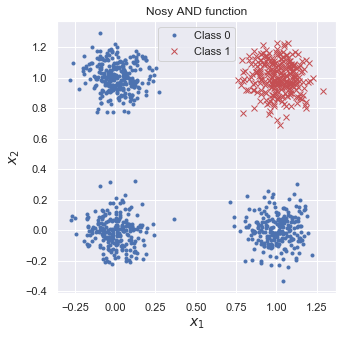

In [59]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy AND function')
plt.legend()
plt.show()

In [60]:
alpha = 0.003

#W = np.zeros((X.shape[1],1))
W = np.random.randn(X.shape[1],1)

numEpochs = 200
error_min = 10000000
error_vec = []
for epoch in range(0,numEpochs):
    idx = np.random.permutation(N)
    Xp = X[idx]
    yp = y[idx]
    
    for i in range(0,N):
        xp = Xp[i,:].reshape(1,3)
        g = xp.dot(W)
        y_pred = activation_func(g)
        e = yp[i].ravel()[0]-y_pred.ravel()[0]
        W = W + alpha*e*xp.T
        
    y_pred = activation_func2(X.dot(W)).reshape(N,)
    
    error = mean_squared_error(y_pred, y)
    error_vec.append(error)
    if(error < error_min):
        error_min = error
        Wmin = W
        
error = mean_squared_error(activation_func2(X.dot(W)), y)
print('MSE W: ', error)

error = mean_squared_error(activation_func2(X.dot(Wmin)), y)
print('MSE Wmin: ', error)

MSE W:  0.0
MSE Wmin:  0.0


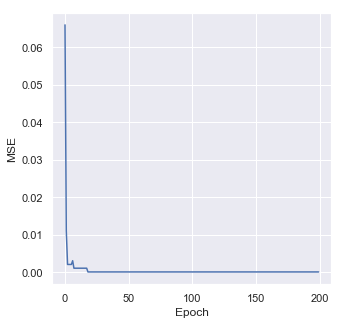

In [61]:
fig = plt.figure(figsize=(5,5))
plt.plot(error_vec)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

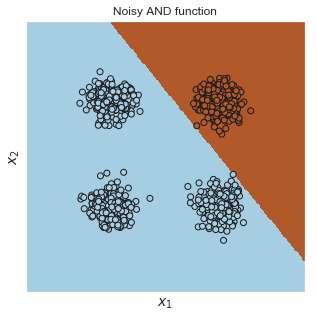

In [62]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()], Wmin)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy AND function')
plt.show()

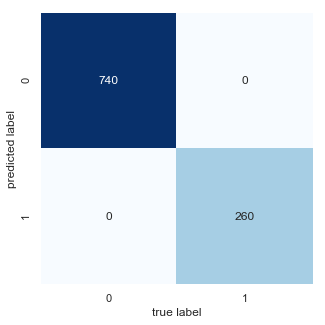

In [63]:
y_pred = predict(X, Wmin)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()